Start moving to the position


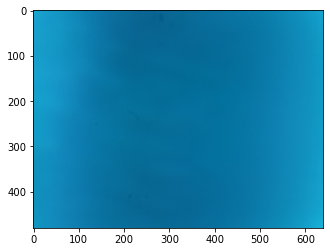

In [6]:
# Connect to the microscope
import microscope_client as ofm_client
microscope = ofm_client.MicroscopeClient(host="21.3.2.3", port=5000)
import time
import numpy as np
import matplotlib.pyplot as plt


# microscope parameters
offset_z = microscope.position['z']


Nx = 3
Ny = 3

name_experiment = "test_large_scan_new_"

def autofocus(dz, nz):
    payload = {'dz': list(np.linspace(-dz,dz,nz))}
    print("Focusing: "+str(payload))
    microscope.extensions["org.openflexure.autofocus"]["autofocus"].post_json(payload)
    return microscope.position['z']

offset_x = 62773
offset_y = 4000

well_to_well_steps = 9000
# move to the home positoin
Nx = Nx
Ny = Ny
print("Start moving to the position")
microscope.move((offset_x+well_to_well_steps,offset_y+well_to_well_steps,offset_z), True)
#opeoffset_z = autofocus(1000,9)
i_well = 0
i_experiment = 0


myimage = microscope.grab_image_array()
plt.imshow(myimage)

In [ ]:
'''
#
myallpositions = ((offset_x+xstart*well_to_well_steps, offset_y+ystart*well_to_well_steps, offset_z),
                    (offset_x+Nx*well_to_well_steps, offset_y+ystart*well_to_well_steps, offset_z),
                    (offset_x+Nx*well_to_well_steps, offset_y+Ny*well_to_well_steps, offset_z),
                    (offset_x+xstart*well_to_well_steps, offset_y+Ny*well_to_well_steps, offset_z))

# 
for _ in range(3)_:
    i_z = []
    for i_scan in myallpositions:
        microscope.move(i_scan, True)
    i_z.append(microscope.position['z'])
'''

print("Start scan")
#%%
focus_pos_list = []
while(True):
    i_well = 0
    for wellpos_y in range(Nx):
        for wellpos_x in range(Nx):
            i_image = 0
            print("Move microscope")
            current_x, current_y = offset_x+well_to_well_steps*wellpos_x,offset_y+well_to_well_steps*wellpos_y
            
            if i_experiment == 0:
                microscope.move((current_x, current_y, offset_z), True)
                offset_z = autofocus(dz=1300, nz=13)
                focus_pos_list.append(offset_z)
            else:
                offset_z = focus_pos_list[i_well]
                microscope.move((current_x, current_y, offset_z), True)
            print("offset_z:"+str(offset_z))



            params={'bayer': False,
                'tags': ["xy_scan_"+str(wellpos_x)+"_"+str(wellpos_y)],
                'temporary': False,
                'use_video_port': True,
                'filename': name_experiment+str(i_experiment)+"_"+str(i_well)+"_"+str(i_image)+"_"+str(wellpos_x)+"_"+str(wellpos_y)}

            time.sleep(.2) # wait for debouncing
            microscope.capture_image_to_disk(params)
            print(name_experiment+str(i_experiment)+"_"+str(i_well)+"_"+str(i_image)+"_"+str(wellpos_x)+"_"+str(wellpos_y))

            i_image += 1

            i_well += 1

    i_experiment += 1


In [12]:

t_period = 0 

# microscope parameters
offset_z = microscope.position['z']

base_file_name = "TEST_"
name_experiment = base_file_name+"_test_large_scan_new_"

well_to_well_steps = 9000
# move to the home positoin
print("Start moving to the position")
microscope.move((offset_x,offset_y,offset_z), True)
#autofocus.autofocus(microscope, np.linspace(-1500, 1500, 11))

i_well = 0
i_experiment = 0

print("Start scan")
#%%
focus_pos_list = []
folder = "SCAN_{}".format(base_file_name)
i_image = 0


time_last = 0
while(True):
    if time.time()-time_last>t_period:

        time_last = time.time()
        i_well = 0
        last_offset_z_row = offset_z
        for wellpos_y in range(Nx):
            for wellpos_x in range(Nx):

                if last_offset_z_row == 0:
                    offset_z = last_offset_z_row

                print("Move microscope")
                current_x, current_y = offset_x+well_to_well_steps*wellpos_x,offset_y+well_to_well_steps*wellpos_y

                if (i_experiment % 10)== 0:
                    if i_well == 0:
                        focus_pos_list = []

                    microscope.move((current_x, current_y, offset_z), True)
                    #autofocus(2000, 13)
                    offset_z = microscope.position['z']                             

                    focus_pos_list.append(offset_z)

                    if last_offset_z_row == 0:
                        last_offset_z_row = offset_z
                else:
                    offset_z = focus_pos_list[i_well]
                microscope.move((current_x, current_y, offset_z), True)
                print("offset_z:"+str(offset_z))

                bayer = False
                tags = ["xy_scan_"+str(wellpos_x)+"_"+str(wellpos_y)]
                temporary =  False
                use_video_port = True
                filename = name_experiment+str(i_experiment)+"_"+str(i_well)+"_"+str(i_image)+"_"+str(wellpos_x)+"_"+str(wellpos_y)

                time.sleep(1) # wait for debouncing
                params={'bayer': False,
                    'tags': ["xy_scan_"+str(wellpos_x)+"_"+str(wellpos_y)],
                    'temporary': False,
                    'use_video_port': True,
                    'filename': name_experiment+str(i_experiment)+"_"+str(i_well)+"_"+str(i_image)+"_"+str(wellpos_x)+"_"+str(wellpos_y)}


                #microscope.capture_image_to_disk(params)
                print(filename)

                i_image += 1

                i_well += 1

        i_experiment += 1





Start moving to the position
Start scan
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_0_0_0_0
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_1_1_1_0
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_2_2_2_0
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_3_3_0_1
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_4_4_1_1
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_5_5_2_1
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_6_6_0_2
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_7_7_1_2
Move microscope
offset_z:-5014
TEST__test_large_scan_new_0_8_8_2_2
Move microscope
offset_z:-5014
TEST__test_large_scan_new_1_0_9_0_0
Move microscope
offset_z:-5014
TEST__test_large_scan_new_1_1_10_1_0
Move microscope
offset_z:-5014
TEST__test_large_scan_new_1_2_11_2_0
Move microscope
offset_z:-5014
TEST__test_large_scan_new_1_3_12_0_1
Move microscope
offset_z:-5014
TEST__test_large_scan_new_1_4_13_1_1
Move microscope
of

KeyboardInterrupt: 